![](https://www.gettyimages.fi/detail/photo/motorcycle-accident-motorradunfall-royalty-free-image/170034903?adppopup=true)

![](https://www.gettyimages.fi/detail/photo/motorcycle-accident-motorradunfall-royalty-free-image/170034903?adppopup=true)

![](accidents.jpg "Title")


# USA car accidents

* This is a countrywide car accident [dataset](https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents), which covers 49 states of the USA. 
* The accident data are collected for the duration of February 2016 to December 2021.

## Importing modules

In [43]:
import pandas as pd
import numpy as np

import os
import dask
import dask.dataframe as dd
import dask.array as da
from glob import glob


# plotly standard imports
import plotly.graph_objs as go
import chart_studio.plotly as py
import plotly.figure_factory as ff

# Cufflinks wrapper on plotly
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)
cf.go_offline(connected=True)
import cufflinks as cf
import matplotlib.pyplot as plt
%matplotlib inline

# Display all cell outputs
##from IPython.core.interactiveshell import InteractiveShell
##InteractiveShell.ast_node_interactivity = 'all'

# Set global theme
##cf.set_config_file(world_readable=True, theme='pearl')

In [3]:
from dask.distributed import Client, progress
client = Client(n_workers=4, threads_per_worker=1, memory_limit='4GB')
client

C:\Users\probs\Anaconda3\lib\site-packages\distributed\node.py:155: UserWarning:

Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 55261 instead



Client Scheduler: tcp://127.0.0.1:55264 Dashboard: http://127.0.0.1:55261/status,Cluster Workers: 4 Cores: 4 Memory: 16.00 GB


## Loading the dataset.
The dataset is loaded as dask dataframe. 

In [4]:
%%time
df = dd.read_csv("US_Accidents_Dec21_updated.csv")
#df_dask=dsk.read_csv('US_Accidents_Dec21_updated.csv',parse_dates = ['Start_Time', 'End_Time'])
df.head()

Wall time: 3.01 s


,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


## Listing the columns.

In [5]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

## Checking the shape of data.

In [6]:
df.shape

(Delayed('int-1436485a-a382-4a70-b73f-820d757e1214'), 47)

In [7]:
len(df.columns)

47

In [8]:
df["ID"].compute().shape

(2845342,)

## Checking summary.

In [9]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
npartitions=1,,,,,,,,,,,,,,
,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [10]:
df.compute().describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


## Finding the number of missing values in each column.

In [11]:
missing_values = df.isnull().sum()
missing_values.compute()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1743911
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1319
Country                        0
Timezone                    3659
Airport_Code                9549
Weather_Timestamp          50736
Temperature(F)             69274
Wind_Chill(F)             469643
Humidity(%)                73092
Pressure(in)               59200
Visibility(mi)             70546
Wind_Direction             73775
Wind_Speed(mph)           157944
Precipitation(in)         549458
Weather_Condition          70636
Amenity   

## Calculating the missing value percentage wise

In [12]:
missing_count = ((missing_values / df.index.size) * 100)
missing_count_pct = missing_count.compute()
missing_count_pct

ID                        0.000000
Severity                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Start_Lng                 0.000000
End_Lat                   0.000000
End_Lng                   0.000000
Distance(mi)              0.000000
Description               0.000000
Number                   61.290031
Street                    0.000070
Side                      0.000000
City                      0.004815
County                    0.000000
State                     0.000000
Zipcode                   0.046356
Country                   0.000000
Timezone                  0.128596
Airport_Code              0.335601
Weather_Timestamp         1.783125
Temperature(F)            2.434646
Wind_Chill(F)            16.505678
Humidity(%)               2.568830
Pressure(in)              2.080593
Visibility(mi)            2.479350
Wind_Direction            2.592834
Wind_Speed(mph)           5.550967
Precipitation(in)   

## Selecting the columns to be dropped having more than 50% missing value

In [13]:
columns_to_drop = missing_count_pct[missing_count_pct > 50].index
columns_to_drop
#df_accident = df.drop(columns_to_drop, axis=1)

Index(['Number'], dtype='object')

## Dropping few columns which we won't use for analysis.

In [14]:
df_accident  = df.drop(['ID', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Wind_Chill(F)', 
                        'Humidity(%)', 'Pressure(in)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)',
                        'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 
                        'Station', 'Stop', 'Traffic_Calming', 'Turning_Loop', 'Civil_Twilight', 'Nautical_Twilight', 
                        'Astronomical_Twilight'], axis = 1)
df_accident.head()

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Visibility(mi),Weather_Condition,Traffic_Signal,Sunrise_Sunset
0,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,10.0,Light Rain,False,Night
1,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,10.0,Light Rain,False,Night
2,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,10.0,Overcast,False,Night
3,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,10.0,Overcast,False,Night
4,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,I-75 S,R,Cincinnati,Hamilton,OH,45217,US,US/Eastern,KLUK,2016-02-08 07:53:00,37.0,10.0,Light Rain,False,Day


## Checking the info of the data.

In [15]:
df_accident.compute().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2845342 entries, 0 to 7173
Data columns (total 20 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Severity           int64  
 1   Start_Time         object 
 2   End_Time           object 
 3   Start_Lat          float64
 4   Start_Lng          float64
 5   Street             object 
 6   Side               object 
 7   City               object 
 8   County             object 
 9   State              object 
 10  Zipcode            object 
 11  Country            object 
 12  Timezone           object 
 13  Airport_Code       object 
 14  Weather_Timestamp  object 
 15  Temperature(F)     float64
 16  Visibility(mi)     float64
 17  Weather_Condition  object 
 18  Traffic_Signal     bool   
 19  Sunrise_Sunset     object 
dtypes: bool(1), float64(4), int64(1), object(14)
memory usage: 436.9+ MB


## Creating a new column by extracting date from "Start_Time".

In [16]:
df_accident['Date'] = dd.to_datetime(df_accident['Start_Time']).dt.date
df_accident['year']= dd.to_datetime(df_accident['Start_Time']).dt.year

## Changing the date format to datetime64.

In [17]:
df_accident.astype({'Date': 'datetime64'}).dtypes

Severity                      int64
Start_Time                   object
End_Time                     object
Start_Lat                   float64
Start_Lng                   float64
Street                       object
Side                         object
City                         object
County                       object
State                        object
Zipcode                      object
Country                      object
Timezone                     object
Airport_Code                 object
Weather_Timestamp            object
Temperature(F)              float64
Visibility(mi)              float64
Weather_Condition            object
Traffic_Signal                 bool
Sunrise_Sunset               object
Date                 datetime64[ns]
year                          int64
dtype: object

## Checking the dtypes after converting the date dtype.

In [18]:
df_accident.dtypes

Severity               int64
Start_Time            object
End_Time              object
Start_Lat            float64
Start_Lng            float64
Street                object
Side                  object
City                  object
County                object
State                 object
Zipcode               object
Country               object
Timezone              object
Airport_Code          object
Weather_Timestamp     object
Temperature(F)       float64
Visibility(mi)       float64
Weather_Condition     object
Traffic_Signal          bool
Sunrise_Sunset        object
Date                  object
year                   int64
dtype: object

## Checking columns and row.

In [19]:
print('total number of accidents :', len(df_accident))
print('number of rows', len(df_accident.index))
print('number of columns', len(df_accident.columns))

total number of accidents : 2845342
number of rows 2845342
number of columns 22


## Calculating the statistics of the whole dataframe

In [20]:
df_accident.describe().compute()

,Severity,Start_Lat,Start_Lng,Temperature(F),Visibility(mi),year
count,2.845342e+06,2.845342e+06,2.845342e+06,2.776068e+06,2.774796e+06,2.845342e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,6.179356e+01,9.099391e+00,2.019981e+03
std,4.787216e-01,5.363797e+00,1.831782e+01,1.862263e+01,2.717546e+00,1.433839e+00
min,1.000000e+00,2.456603e+01,-1.245481e+02,-8.900000e+01,0.000000e+00,2.016000e+03
25%,2.000000e+00,3.403005e+01,-1.174316e+02,5.500000e+01,1.000000e+01,2.020000e+03
50%,2.000000e+00,3.910580e+01,-8.671755e+01,6.900000e+01,1.000000e+01,2.021000e+03
75%,3.000000e+00,4.336657e+01,-8.019829e+01,8.400000e+01,1.000000e+01,2.021000e+03
max,4.000000e+00,4.900058e+01,-6.711317e+01,1.960000e+02,1.400000e+02,2.021000e+03


## Finding total number of accidents from each State.

In [21]:
df_accident['State'].value_counts().compute()

CA    795868
FL    401388
TX    149037
OR    126341
VA    113535
NY    108049
PA     99975
MN     97185
NC     91362
SC     89216
MD     65085
AZ     56504
NJ     52902
TN     52613
UT     49193
LA     47232
IL     47105
MI     43843
GA     40086
WA     32554
CT     29762
MO     29633
CO     25340
OH     24409
IN     20850
AL     19322
MT     15964
AR     10935
IA      9607
DC      9133
KS      9033
OK      8806
ID      8544
WI      7896
WV      7632
KY      6638
MA      6392
NV      6197
MS      5320
DE      4842
RI      4451
NH      3866
NE      3320
NM      2370
ND      2258
ME      2193
WY       990
VT       365
SD       201
Name: State, dtype: int64

## Plotting the distribution with respect to state

In [22]:
(df_accident['State']
 .value_counts().compute()
 .reset_index()
 .iplot(kind='pie', labels='index', values='State', textinfo='value+percent', 
        pull=0.05, title='Accident information with respect to State'))

## Claculating the number of accidents per state

In [23]:
df_accident['State'].value_counts().compute().iplot(kind = 'bar', colors = 'navy')

## Generating a correlation matrix

In [24]:
corr_mat = df_accident.corr().compute()

In [25]:
figure = ff.create_annotated_heatmap(
    z=corr_mat.values,
    x=list(corr_mat.columns),
    y=list(corr_mat.index),
    annotation_text=corr_mat.round(2).values,
    showscale=True)

figure

<AxesSubplot:>

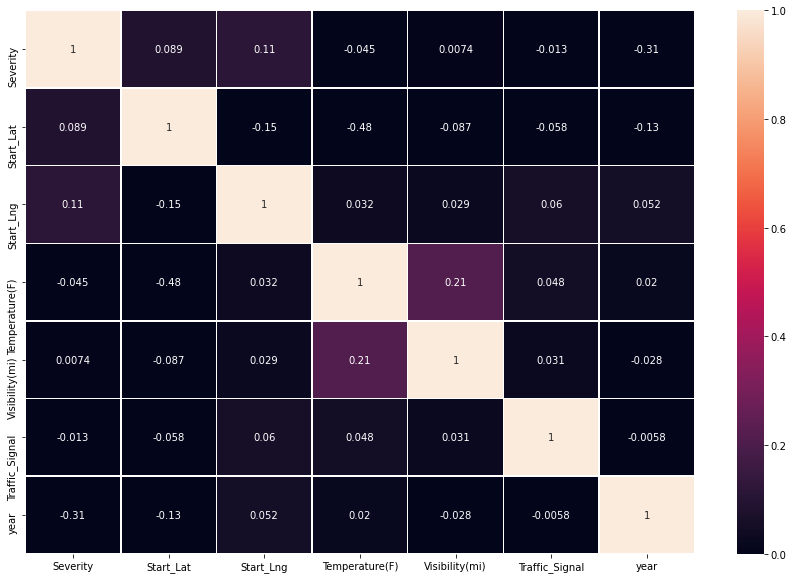

In [45]:
import seaborn as sns
plt.subplots(figsize=(15, 10))
sns.heatmap(corr_mat, annot=True, linewidths=.5, vmin=0, vmax=1)

## Checking the highest severity index.

In [26]:
%%time
df_accident.Severity.max().compute()

Wall time: 18.3 s


4

## Plotting the severity distribution

In [27]:
(df_accident['Severity']
 .value_counts().compute()
 .reset_index()
 .iplot(kind='pie', labels='index', values='Severity', textinfo='value+percent', 
        pull=0.05, title='Distribution of Severity of cases'))

## Visualizing the severity.

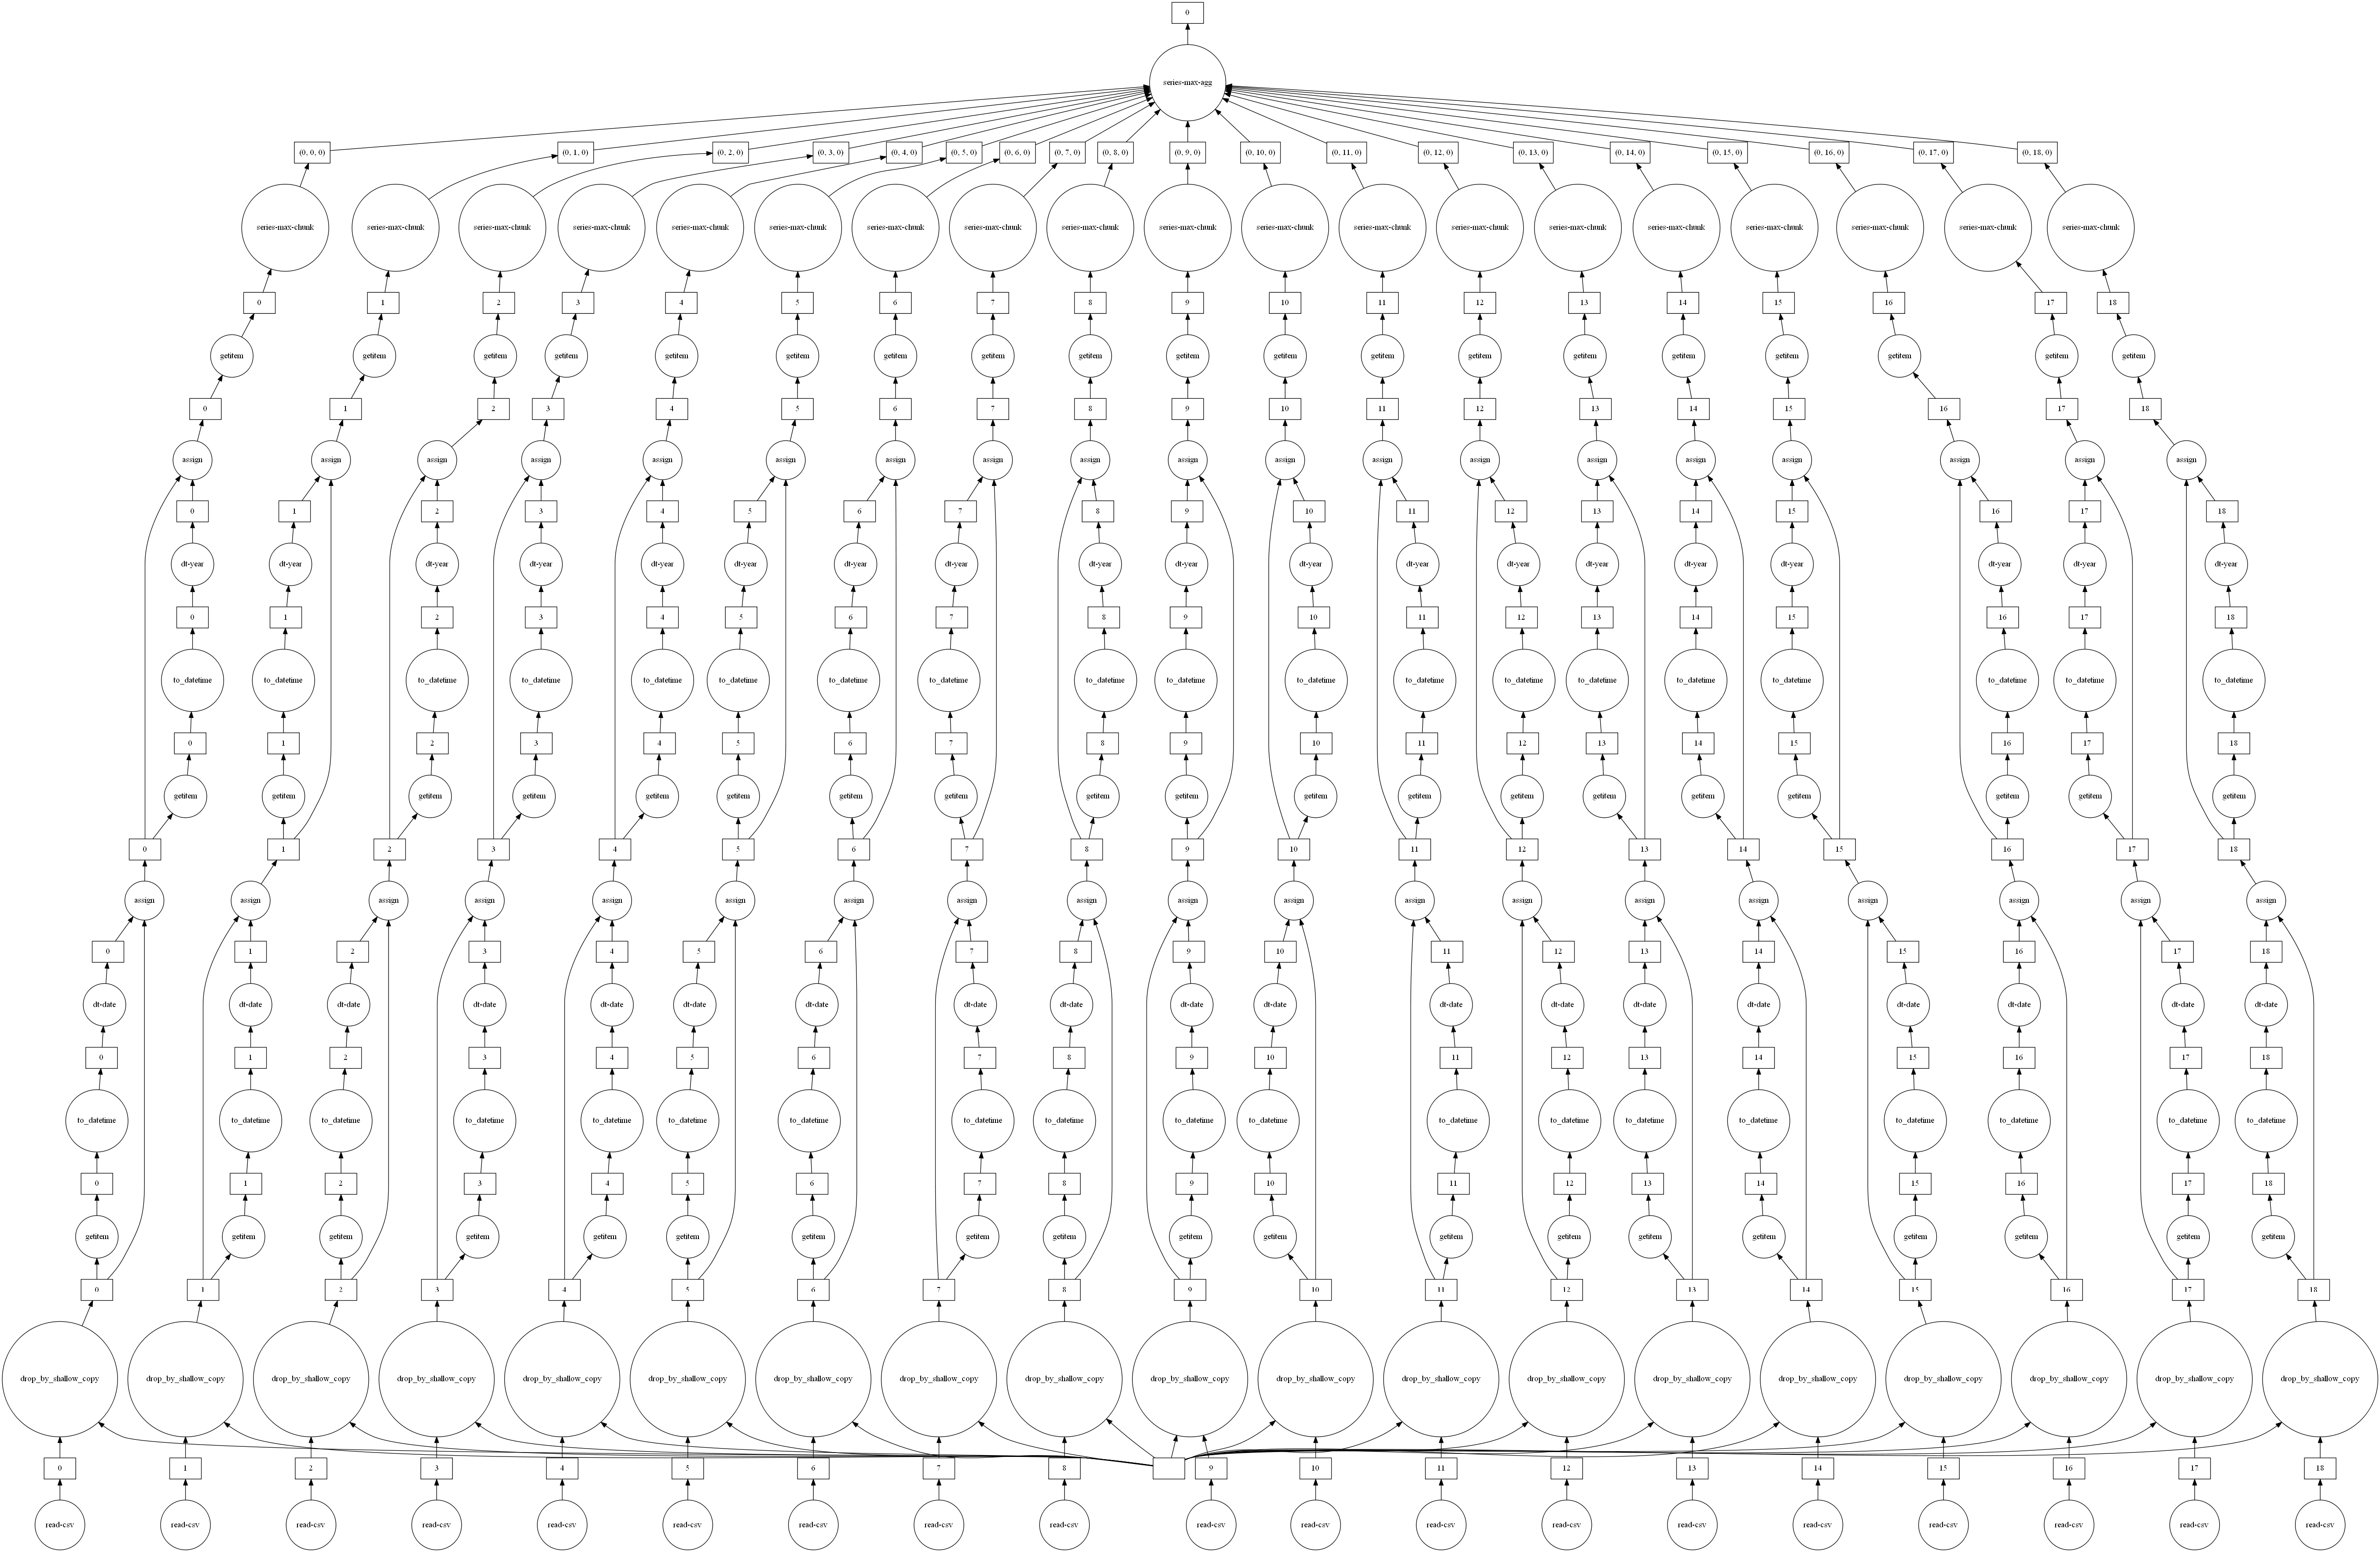

In [28]:
df_accident.Severity.max().visualize()

## Calculating the most affected side

In [29]:
df_accident['Side'].value_counts().compute().iplot(kind = 'bar',
                                                   colors = 'mediumvioletred')

## Timezone count with number of accident for each

In [30]:
df_accident['Timezone'].value_counts().compute().iplot(kind = 'bar', 
                                                       colors = 'firebrick')

## Showing the condition and the accidents that happened in that condition

In [31]:
df_accident.Weather_Condition.value_counts().compute().iplot(
fill=True,colors=['pink'], world_readable=True)

We can see most accidents happened in CA.

# Creating a new data frame only for CA.

In [32]:
df_accident_CA=df_accident[(df_accident["State"] =="CA")]
df_accident_CA.head()

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Street,Side,City,County,State,...,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Visibility(mi),Weather_Condition,Traffic_Signal,Sunrise_Sunset,Date,year
988,3,2016-03-22 18:53:11,2016-03-23 00:53:11,38.825840,-120.029214,US Highway 50,L,Echo Lake,El Dorado,CA,...,US/Pacific,KTVL,2016-03-22 18:53:00,28.9,10.0,Clear,False,Day,2016-03-22,2016
989,2,2016-03-22 19:00:49,2016-03-23 01:00:49,37.358209,-121.840017,I-680 N,R,San Jose,Santa Clara,CA,...,US/Pacific,KRHV,2016-03-22 18:48:00,57.2,10.0,Scattered Clouds,False,Day,2016-03-22,2016
990,3,2016-03-22 20:07:32,2016-03-23 02:07:32,37.881943,-122.307987,I-580 W,R,Berkeley,Alameda,CA,...,US/Pacific,KOAK,2016-03-22 19:53:00,57.0,10.0,Partly Cloudy,False,Night,2016-03-22,2016
991,2,2016-03-22 21:40:18,2016-03-23 03:40:18,37.881038,-122.307788,I-580 W,R,Berkeley,Alameda,CA,...,US/Pacific,KOAK,2016-03-22 21:53:00,55.0,10.0,Clear,False,Night,2016-03-22,2016
992,2,2016-03-22 21:36:42,2016-03-23 03:36:42,38.518811,-121.101664,Latrobe Rd,R,Sloughhouse,Sacramento,CA,...,US/Pacific,KMHR,2016-03-22 20:45:00,55.4,10.0,Clear,False,Night,2016-03-22,2016


## Extracting the data for each county of CA.

In [33]:
tot_accident_countywise_CA=df_accident_CA.groupby("County").year.count().compute()
tot_accident_countywise_CA.head()

County
Alameda      38997
Alpine         270
Amador        1402
Butte         3547
Calaveras     1730
Name: year, dtype: int64

## Showing the accidents for different counties through bar plot.

In [34]:
tot_accident_countywise_CA.iplot(
    kind='bar',
    xTitle='County',
    yTitle='Accidents',
    title='Accidents in CA')

## Resetting the index

In [35]:
df_accident_countywise_CA=tot_accident_countywise_CA.reset_index()
df_accident_countywise_CA.head()

,County,year
0,Alameda,38997
1,Alpine,270
2,Amador,1402
3,Butte,3547
4,Calaveras,1730


## Showing the percentage of accidents in all county of CA.

In [36]:
df_accident_countywise_CA.iplot(
    kind='pie', 
    labels='County',
    values='year',
    title='Percentage of Accidents')